In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

# Начальные данные


In [2]:
#for X1
n1 = 100

sample1 = stats.chi2(5).rvs(n1) 

mean1 = np.mean(sample1)
var1 = np.var(sample1, ddof = 1)
std1 = np.std(sample1)

print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n1 = %.3f" % (mean1, var1, std1, n1))

X1: mean1 = 4.949; var1 = 7.923; std1 = 2.801; n1 = 100.000


In [3]:
#for X2
n2 = 100

sample2 = stats.chi2(5).rvs(n2) 

mean2 = np.mean(sample2)
var2 = np.var(sample2, ddof = 1)
std2 = np.std(sample2)

print("X2: mean1 = %.3f; var2 = %.3f; std2 = %.3f; n2 = %.3f" % (mean2, var2, std2, n2))

X2: mean1 = 5.110; var2 = 8.608; std2 = 2.919; n2 = 100.000


In [4]:
#for X3
n3 = 200

sample3 = stats.norm(loc=5, scale=3).rvs(n3) 

mean3 = np.mean(sample3)
var3 = np.var(sample3, ddof = 1)
std3 = np.std(sample3)

print("X3: mean3 = %.3f; var3 = %.3f; std3 = %.3f; n3 = %.3f" % (mean3, var3, std3, n3))

X3: mean3 = 4.938; var3 = 8.151; std3 = 2.848; n3 = 200.000


In [5]:
#Pooled for X1, X2, X3

mean_pol = (n1 * mean1 + n2 * mean2 + n3 * mean3)/(n1 + n2 + n3) 
var_pol = ((n1 - 1) * var1 + (n2 - 1) * var2 + (n3 - 1) * var3) / (n1 + n2 + n3 - 3) #вопрос
std_pol = var_pol**1/2
n_pol = n1 + n2 + n3
print("Pooled for X1, X2, X3: mean_pol = %.3f; var_pol = %.3f; std_pol = %.3f; n_pol = %.3f" % (mean_pol, var_pol, std_pol, n_pol))

Pooled for X1, X2, X3: mean_pol = 4.984; var_pol = 8.208; std_pol = 4.104; n_pol = 400.000


In [6]:
mean1, mean2, mean3

(4.948617894282347, 5.109785089676684, 4.938443383206988)

# Boxplot

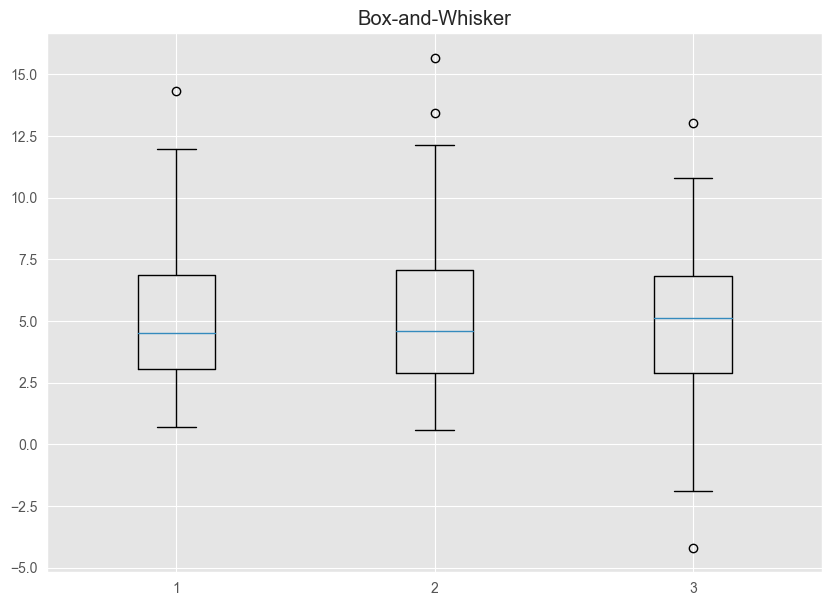

In [7]:
#plt.boxplot(sample1)
data = [sample1, sample2, sample3]

fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)

# Adding title
plt.title("Box-and-Whisker")

# x-axis labels


plt.show()

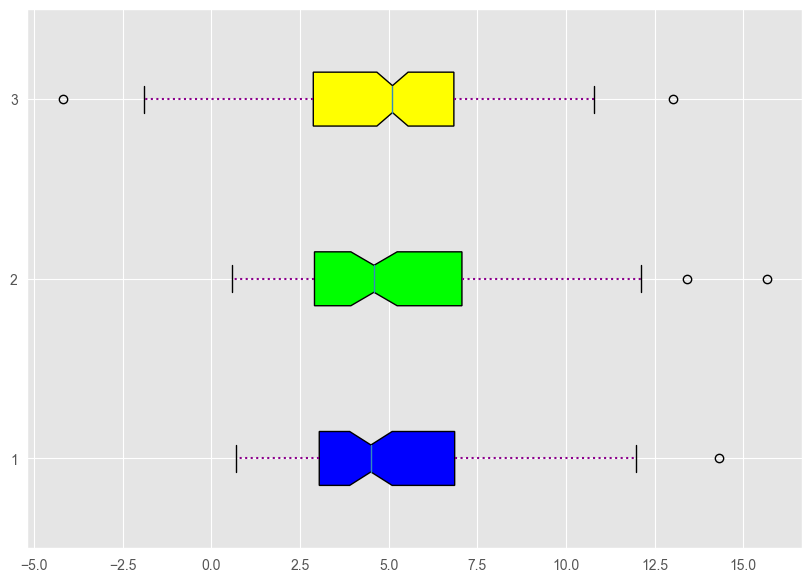

In [8]:
data = [sample1, sample2, sample3]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
    


# Проверка условия применимости дисперсионного анализа

In [9]:
#критерий Бартлетта
stats.bartlett(sample1, sample2, sample3)

BartlettResult(statistic=0.1794874358329657, pvalue=0.9141654394758765)

# Однофакторный дисперсионный анализ

In [10]:
#Однофакторный дисперсионный анализ
stats.f_oneway(sample1, sample2, sample3)

F_onewayResult(statistic=0.12929302986404453, pvalue=0.8787534229514428)

In [11]:
K = 3
n = n1 + n2 + n3
mean = (sum(sample1) + sum(sample2) + sum(sample3))/n #общее среднее

#общая дисперсия
s = 0
for ar in data:
  for x in ar:
    s += (x - mean)**2
D_x = s/n

#внутригрупповая дисперсиея
s = 0
for ar in data:
  s = s + len(ar) * np.var(ar)
D_w = s/n

#межгрупповая дисперсия
s = 0
for ar in data:
  s = s + len(ar) * (np.mean(ar) - mean)**2
D_b = s/n

#print(D_x)
#print(D_w + D_b)

print("D_b = %.3f" % D_b)
print("D_w = %.3f" % D_w)
print("D_x = %.3f" % D_x)

print('Несмещенная оценка групировочного признака: {z:.3f}'.format(z = (D_b * n)/(K - 1)))
print('Несмещенная оценка остаточного признака: {z:.3f}'.format(z = (D_w * n)/(n - K)))
print('Несмещенная оценка всех признаков: {z:.3f}'.format(z = (D_x * n)/(n - 1)))


D_b = 0.005
D_w = 8.146
D_x = 8.152
Несмещенная оценка групировочного признака: 1.061
Несмещенная оценка остаточного признака: 8.208
Несмещенная оценка всех признаков: 8.172


In [12]:
eta_squared = D_b / D_x   #эмпирический коэффициент детерминации
eta = eta_squared ** (1/2)   #эмпирическое корреляционное отношение

print("эмпирический коэффициент детерминации: %.3f" % eta_squared)
print("эмпирическое корреляционное отношение: %.3f" % eta)


эмпирический коэффициент детерминации: 0.001
эмпирическое корреляционное отношение: 0.026


# Метод линейных контрастов


In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
f_oneway(sample1, sample2, sample3)

df = pd.DataFrame({'score': np.concatenate((sample1, sample2, sample3)),
                   'group': np.concatenate((np.repeat(['data_1', 'data_2'], repeats=100) ,np.repeat(['data_3'], repeats=200)))}) 

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)# Доверительные интервалы для мат ожиданий


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
data_1 data_2   0.1612 0.9165  -0.792 1.1143  False
data_1 data_3  -0.0102 0.9995 -0.8356 0.8153  False
data_2 data_3  -0.1713 0.8769 -0.9968 0.6541  False
---------------------------------------------------


# Доверительные интервалы для мат ожиданий

In [14]:
alpha = 0.05

c12 = mean1 - mean2
c13 = mean1 - mean3
c23 = mean2 - mean3
var12 = (n * D_w) * (1/n1 + 1/n2) / (n - K)
var13 = (n * D_w) * (1/n1 + 1/n3) / (n - K)
var23 = (n * D_w) * (1/n2 + 1/n3) / (n - K)

quantile_f = stats.f(K-1,n-K).ppf(1 - alpha)

c12_lower = c12 - (var12 * (K-1) * quantile_f)**(1/2)
c13_lower = c13 - (var13 * (K-1) * quantile_f)**(1/2)
c23_lower = c23 - (var23 * (K-1) * quantile_f)**(1/2)

c12_upper = c12 + (var12 * (K-1) * quantile_f)**(1/2)
c13_upper = c13 + (var13 * (K-1) * quantile_f)**(1/2)
c23_upper = c23 + (var23 * (K-1) * quantile_f)**(1/2)


C:\Users\Artemii\AppData\Local\Temp\ipykernel_13868\904325839.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='orange')


([<matplotlib.axis.YTick at 0x20a7e1dac40>,
 [Text(0, 0, 'C12'), Text(0, 1, 'C13'), Text(0, 2, 'C23')])

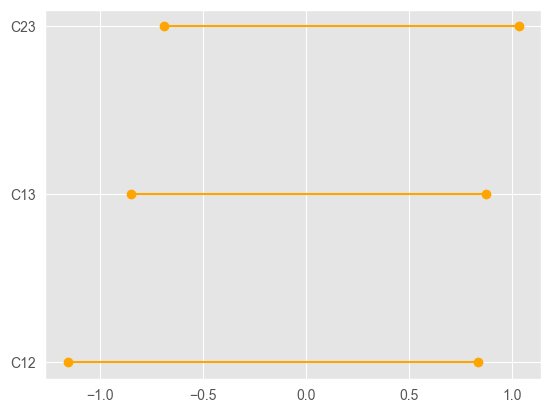

In [15]:
data_dict = {}
data_dict['category'] = ['C12','C13','C23']
data_dict['lower'] = [c12_lower, c13_lower, c23_lower]
data_dict['upper'] = [c12_upper, c13_upper, c23_upper]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))